# Blossom Bank also known as BB PLC, a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London,UK.



# Problem 

## There is an occassional occurence of fraudelent transactions, Blossom Bank therefore wants to build a Machine Learning model to predict online payment fraud.

In [2]:
# IMPORT NECESSERY LIBRARIES
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# LOAD DATA INTO THE NOTEBOOK
data = pd.read_csv(r'C:\Users\COMPUTER SCIENCE\Desktop\personal dev\CAPSTONE PROJECT\Online Payment Fraud Detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [20]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB



# UNDERSTANDING THE DATA USING EXPLORATORY DATA ANALYSIS
THE FOLLOWING QUESTIONS ARE BEING ANSWERED IN THIS SECTION

1. WHO ARE THE 10 MOST ACTIVE CUSTOMERS(frequency)(for both the sender and the receiver)
2. WHO ARE THE 10 CUSTOMERS WITH THE BIGGEST TRANSACTIONS 
3. WHICH PAYMENT TYPE IS MOST PREFERED BY CUSTOMERS AND THEIR RATE OF USEAGE
4. WHO ARE THE BANK VIP (newbalanceorig)
5. WHAT IS THE PERCENTAGE FRAUD FROM ALL TRANSACTIONS
6. WHICH STEP HAD THE HIGHEST VOLUME OF TRANSACTION


In [141]:
#checking for the frequency of transactions per step (hour)
data['step'].value_counts().head()
# step 19 had the highest number of transactions

19    51352
18    49579
43    45060
15    44609
17    43361
Name: step, dtype: int64

In [4]:
# TO DISCOVER THE LEVEL OF USEAGE OF EACH TRANSACTION TYPE
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [5]:
#CASH_OUT IS THE MOST COMMON MEANS OF TRANSACTION
data['type'].mode()

0    CASH_OUT
Name: type, dtype: object

In [6]:
data['nameOrig'].value_counts().head()
# THE MAXIMUM NO OF TRANSACTION BY ANY CUSTOMER IS 2

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
Name: nameOrig, dtype: int64

In [73]:
 fraud_data = data['isFraud'].value_counts()
 fraud_data

0    1047433
1       1142
Name: isFraud, dtype: int64

In [143]:
# BANK VIPS
bank_vip= data['newbalanceOrig'].value_counts()
bank_vip

#580k of account balance is zero naira. over 50% of account balances

0.00           580275
10300000.00       450
10100000.00       449
10200000.00       435
10900000.00       405
                ...  
340001.65           1
272919.15           1
5034.69             1
17148.54            1
69134.92            1
Name: newbalanceOrig, Length: 440792, dtype: int64


# INSIGHT FROM THE INFORMATION ABOVE
# More than 50% of the customers operated a zero account.  

# ACTION SHOULD BE TAKEN TO ADDRESS THIS

In [63]:
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [14]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False



# CREATING VISUALS

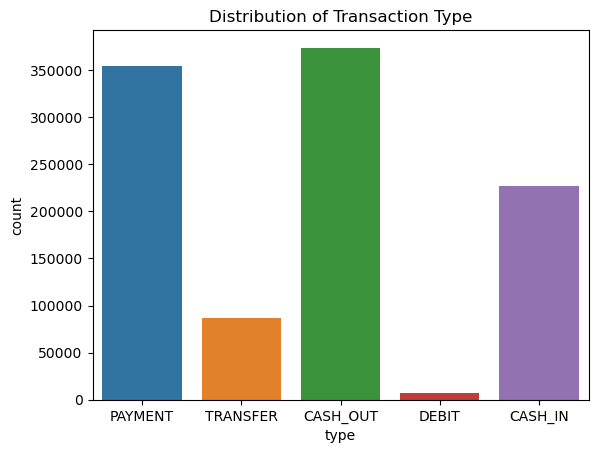

<Figure size 2000x600 with 0 Axes>

In [6]:
# Univariate analysis


plt.title('Distribution of Transaction Type')
sns.countplot(x='type', data=data);
#sns.histplot(data['type']);
plt.show()
plt.figure(figsize=(20,6));



In [21]:

#bank_vip.plot(kind= 'pie')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


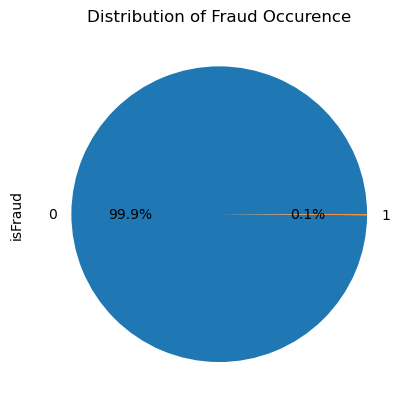

<Figure size 2000x1200 with 0 Axes>

In [20]:
plt.title('Distribution of Fraud Occurence')
data['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%');
plt.figure(figsize=(20,12));


# BIVARIATE ANALYSIS

In [ ]:

#to know total amount of fraudulent transactions


In [144]:
data.groupby('type')['amount'].sum().sort_values(ascending=True).head()

type
DEBIT       4.219599e+07
PAYMENT     3.936097e+09
CASH_IN     3.859476e+10
TRANSFER    5.503644e+10
CASH_OUT    6.876474e+10
Name: amount, dtype: float64

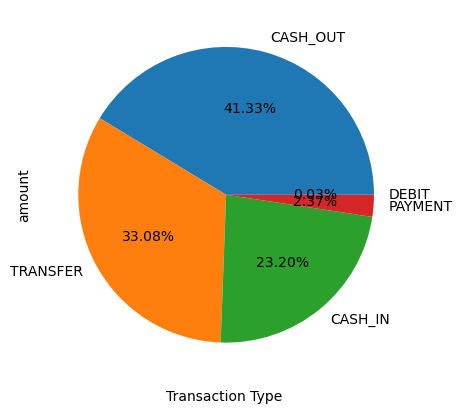

In [90]:

# most people prefered cash out, debit is least 
data.groupby('type')['amount'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%');

# plt.title('transaction type volume')
# plt.ylabel('Amount')

plt.xlabel('Transaction Type ');



In [4]:

# a function that creates a new column describing the fraud codes in categorical format
def Fraud(x):
    if x==1:
        return 'Fraudelent Transaction'
    else:
        return 'Non-Fraudlent transaction'
data['described_isFraud']= data['isFraud'].apply(Fraud)
data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,described_isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,Non-Fraudlent transaction
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,Non-Fraudlent transaction
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,Fraudelent Transaction
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,Fraudelent Transaction
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,Non-Fraudlent transaction
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,Non-Fraudlent transaction
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,Non-Fraudlent transaction
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,Non-Fraudlent transaction
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,Non-Fraudlent transaction


<AxesSubplot:xlabel='type', ylabel='count'>

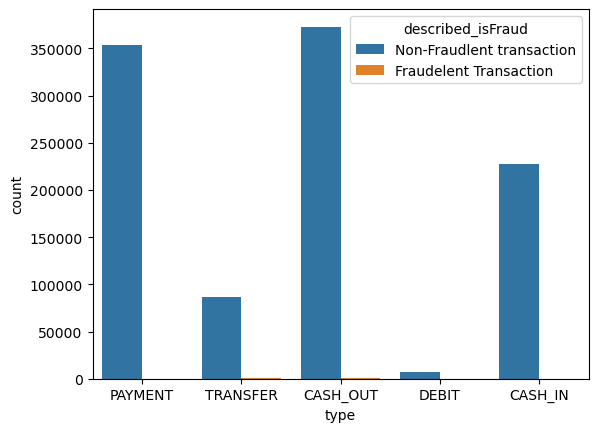

In [18]:
sns.countplot(x='type', hue= 'described_isFraud', data= data);


# Fraudulent transactions occured most in Transfer type of transactions. It was least in Payment and Cash_in, then Debit(in decreasing order)

<AxesSubplot:xlabel='type', ylabel='count'>

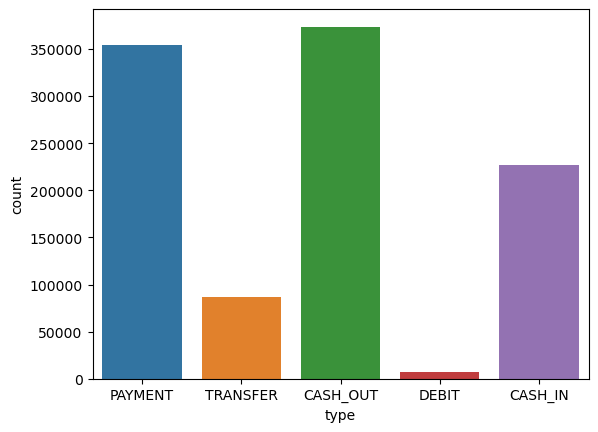

In [5]:

# Distribution of transaction method employed by customers
sns.countplot(x='type', data=data)

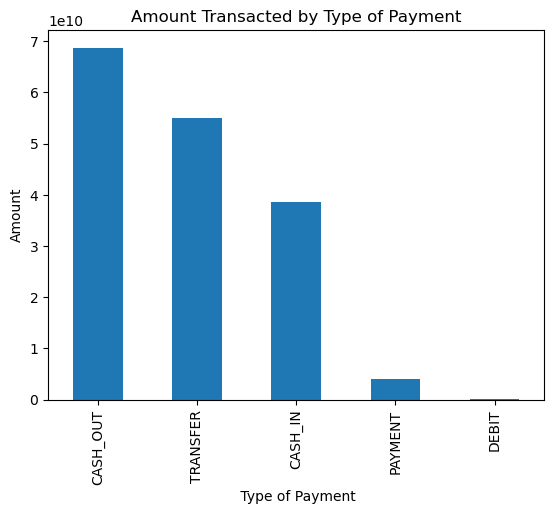

In [101]:
data.groupby('type')['amount'].sum().sort_values(ascending=False).plot(kind='bar');

plt.title('Total Amount Transacted by Type of Payment')
plt.ylabel('Amount')
plt.xlabel(' Type of Payment');

<AxesSubplot:xlabel='described_isFraud', ylabel='amount'>

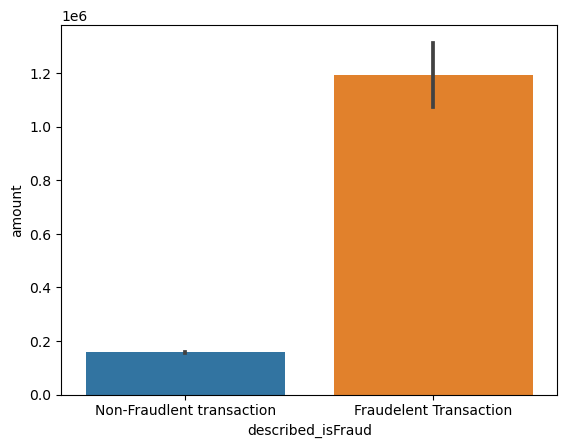

In [9]:
sns.barplot(data=data, y='amount', x= 'described_isFraud' )



# About 1.2million pounds, representing almost 87% of the total amount transacted was fraudulent. Even though it represented just about 0.1% of the transaction volume

<AxesSubplot:xlabel='step', ylabel='Count'>

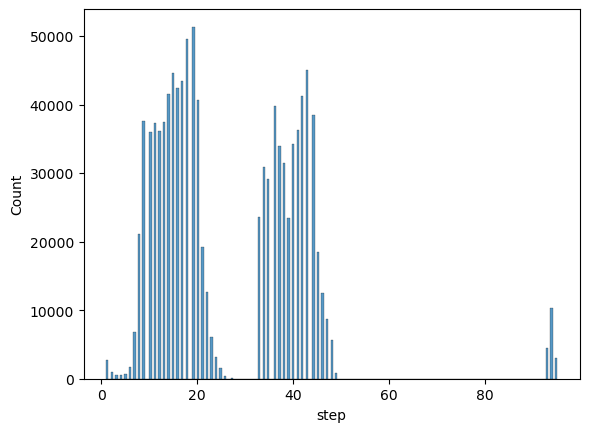

In [12]:

# TOTAL AMOUNT TRANSACTED AT EACH STEP
sns.histplot(x='step', data=data)

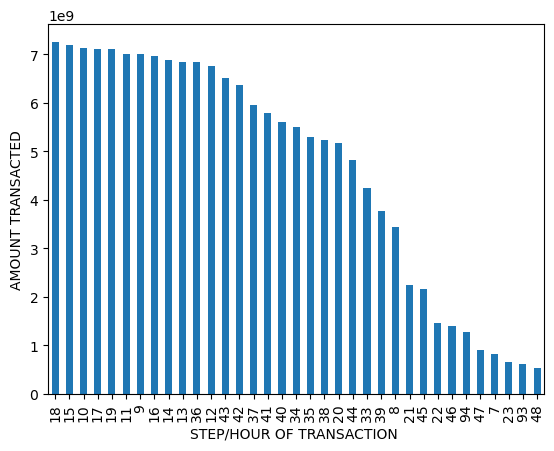

In [23]:

# Amount transacted per Step in Decreasing order
data.groupby('step')['amount'].sum().sort_values(ascending=False).head(35).plot(kind='bar');

# plt.title('category that had the fattest account balance')
# plt.ylabel('Amount')
plt.ylabel('AMOUNT TRANSACTED')
plt.xlabel('STEP/HOUR OF TRANSACTION ');

# Amount transacted per Step in Decreasing order is shown up here

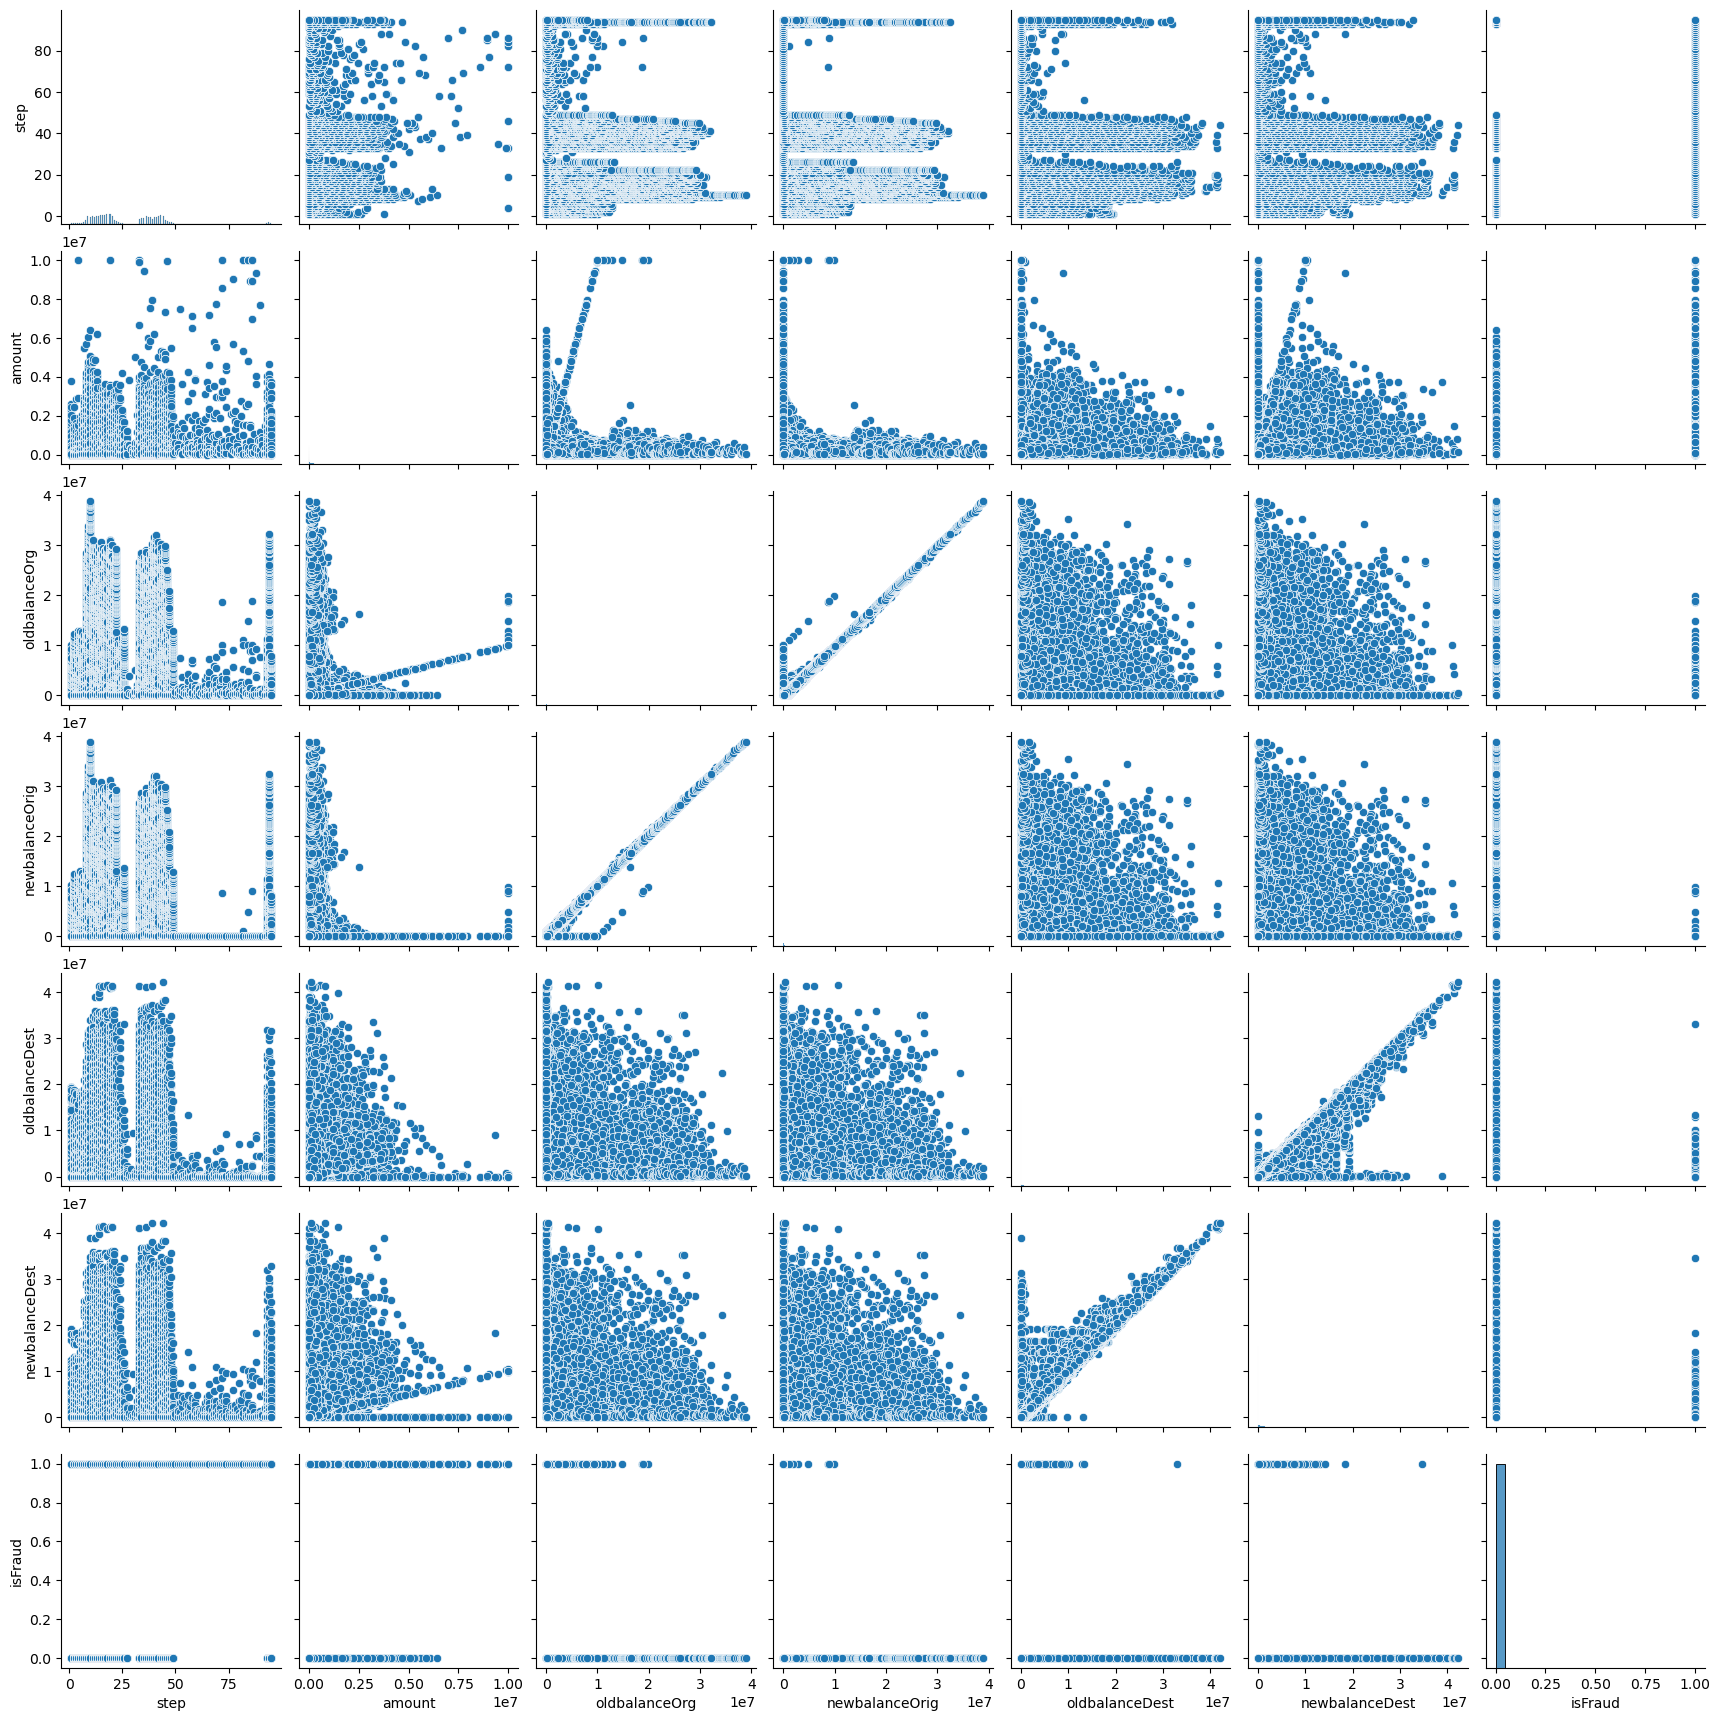

In [116]:
sns.pairplot(data)


# MULTIVARIATE ANALYSIS

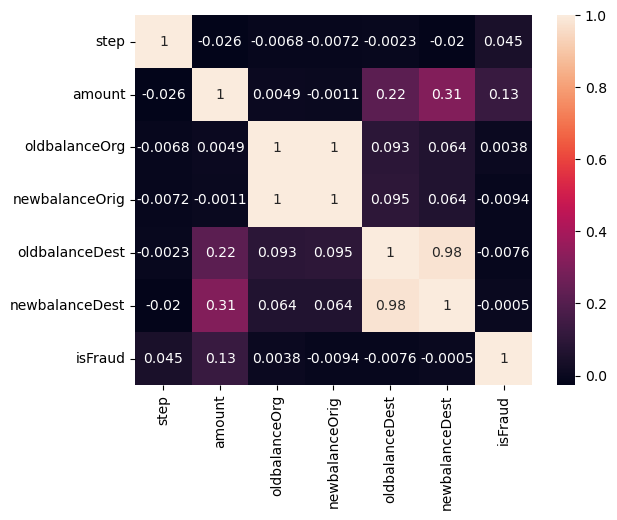

In [121]:
relationship = data.corr()
sns.heatmap(relationship, annot=True);



# results from this heartmap show a strong correlation between oldbalanceOrg and newbalanceorig, and also for oldbalncedest and newbancedest, and little correlation btw amount and newbalancedest


# FEATURE ENGINEERING

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  CASH_IN         5 non-null        float64
 11  CASH_OUT        5 non-null        float64
 12  DEBIT           5 non-null        float64
 13  PAYMENT         5 non-null        float64
 14  TRANSFER        5 non-null        float64
dtypes: float64(10), int64(2), object(3)
memory usage: 128.0+ MB


In [75]:
data.duplicated().sum()

0

In [22]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# ENCODING CATEGORICAL VARIABLES 

In [5]:
#convert column Type transaction into numerical data


#data = pd.get_dummies(data)

#data

numerical_dummies = pd.get_dummies(data['type'] ).head()
numerical_dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [6]:

# concatenate numerical_dummies into the original data



#data['type']  = numerical_dummies.append
#data.head()

data = pd.concat([data, numerical_dummies], axis=1)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,described_isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Non-Fraudlent transaction,0.0,0.0,0.0,1.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Non-Fraudlent transaction,0.0,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudelent Transaction,0.0,0.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudelent Transaction,0.0,1.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Non-Fraudlent transaction,0.0,0.0,0.0,1.0,0.0


In [7]:
target = data['isFraud']
data = data.drop(columns=['nameOrig','nameDest','isFraud', 'step','type', 'described_isFraud' ])



In [8]:
data.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [9]:

data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0



# MODEL SELECTION, TRAINING AND VALIDATION 


# Scaling of the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
data = scaler.fit_transform(data).astype(int)
#(np.nan, 0)
data

array([[          0,           0,           0, ...,           0,
                  0,           0],
       [          0,           0,           0, ...,           0,
                  0,           0],
       [          0,           0,           0, ...,           0,
                 -1,           1],
       ...,
       [          0,           0,           0, ..., -2147483648,
        -2147483648, -2147483648],
       [          0,           0,           0, ..., -2147483648,
        -2147483648, -2147483648],
       [          0,           0,           0, ..., -2147483648,
        -2147483648, -2147483648]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(data,target, test_size= 0.2, random_state=5)

In [14]:
X_train.shape

(838860, 10)

In [43]:
y_train.shape

(838860,)


# BUILDING A RANDOM FOREST CLASSIFICATION MODEL

In [12]:

# USING RANDOM FOREST CLASSIFIER


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
# loading data into the randomforsst classifier and predicting fraud
check = model.fit(X_train, y_train).predict(x_test)
check

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)


# EVALUATING MODEL PERFORMANCE


# EVALUATE MODEL 1 PERFORMANCES using accuracy score and f1 score

In [95]:
from sklearn import metrics
my_metrics = metrics.recall_score(check, y_test)
print(my_metrics)



1.0


In [96]:
from sklearn import metrics
my_metrics = metrics.f1_score(y_test, check)
print(my_metrics)


0.1673003802281369


In [97]:
from sklearn import metrics
my_metrics = metrics.precision_score(y_test, check)
print(my_metrics)

1.0


In [48]:
from sklearn import metrics
my_metrics = metrics.confusion_matrix(y_test, check)
print(my_metrics)

[[209474      0]
 [   219     22]]


In [14]:
from sklearn import metrics
my_metrics = metrics.classification_report(y_test, check);
print(my_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       1.00      0.09      0.17       241

    accuracy                           1.00    209715
   macro avg       1.00      0.55      0.58    209715
weighted avg       1.00      1.00      1.00    209715



# CLASSIFICATION MODEL 2


In [15]:

# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [16]:
# loading data into the naive bayes classifier and predicting fraud
check = model.fit(X_train, y_train).predict(x_test)
check

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)


# EVALUATE MODEL 2 PERFORMANCES using accuracy score and f1 score

In [17]:
from sklearn import metrics
my_metrics = metrics.recall_score(check, y_test)
print(my_metrics)


0.3333333333333333


In [103]:
from sklearn import metrics
my_metrics = metrics.f1_score(y_test, check)
print(my_metrics)

0.00819672131147541


In [64]:
from sklearn import metrics
my_metrics = metrics.confusion_matrix(y_test, check)
print(my_metrics)

[[209472      2]
 [   240      1]]


In [104]:
from sklearn import metrics
my_metrics = metrics.precision_score(y_test, check)
print(my_metrics)

0.3333333333333333


In [21]:
from sklearn import metrics
my_metrics = metrics.classification_report(y_test, check);
print(my_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       0.33      0.00      0.01       241

    accuracy                           1.00    209715
   macro avg       0.67      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715




# CLASSIFICATION MODEL 3


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)



GradientBoostingClassifier()


# EVALUATE MODEL 3 PERFORMANCES using accuracy score, precision, confusion matrix and f1 score

In [19]:
# loading data into the GradientBoostingClassifier and predicting fraud
check = model.fit(X_train, y_train).predict(x_test)
check

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn import metrics
my_metrics = metrics.recall_score(check, y_test)
print(my_metrics)


1.0


In [89]:
from sklearn import metrics
my_metrics = metrics.f1_score(y_test, check)
print(my_metrics)

0.1673003802281369


In [85]:
from sklearn import metrics
my_metrics = metrics.confusion_matrix(y_test, check)
print(my_metrics)

[[209474      0]
 [   241      0]]


In [90]:
from sklearn import metrics
my_metrics = metrics.precision_score(y_test, check)
print(my_metrics)

1.0


In [20]:
from sklearn import metrics
my_metrics = metrics.classification_report(y_test, check);
print(my_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       1.00      0.09      0.17       241

    accuracy                           1.00    209715
   macro avg       1.00      0.55      0.58    209715
weighted avg       1.00      1.00      1.00    209715




# CLASSIFICATION MODEL 4

In [15]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [16]:
# loading data into the SVM model and predicting fraud
check = model.fit(X_train, y_train).predict(x_test)
check

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)


# EVALUATE MODEL 4 PERFORMANCES using accuracy score, precision, confusion matrix and f1 score


In [82]:
from sklearn import metrics
my_metrics = metrics.recall_score(check, y_test)
print(my_metrics)

0.0


C:\Users\COMPUTER SCIENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn import metrics
my_metrics = metrics.f1_score(y_test, check)
print(my_metrics)

0.0


In [73]:
from sklearn import metrics
my_metrics = metrics.confusion_matrix(y_test, check)
print(my_metrics)

[[209474      0]
 [   241      0]]


In [81]:
from sklearn import metrics
my_metrics = metrics.precision_score(y_test, check);
print(my_metrics)

0.0


C:\Users\COMPUTER SCIENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn import metrics
my_metrics = metrics.classification_report(y_test, check);
print(my_metrics)

C:\Users\COMPUTER SCIENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\COMPUTER SCIENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       0.00      0.00      0.00       241

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



C:\Users\COMPUTER SCIENCE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# It is important to take cognizance of the True-Positive, which were the correctly predicted fraudulent transaction. The percentage of success alludes to the robustness of the RandomForest and Gradient Boosting Classifier. 



# Attention must be paid however to the False-Negatives, which represent a portion that were predicted to be non-fraudulent, but which were in actual fact fraudulent transactions. Interestingly, the model had no occurrence of such.



# MY BEST PERFORMING MODELS are Random Forest Classifier and Gradient Boosting Classifier. They posted same output